# ML models results overview

Liberie varie da installare

In [130]:
#!pip install pandas
#!pip install xlsxwriter

Inclusione delle librerie utilizzate

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
# Change plot output format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from pandas import ExcelWriter

Variabili di gestione files

In [132]:
# Path of the directory containing .pkl file of the different ML models results, can be changed
DATASET_PATH = r"C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\ML_models\ML_model_experiments.pkl"

# True = export summary file in the OUTPUT_PATH
to_export = True

# Content of the exported document, possible values are 'Rankings' or 'Description',
# the default value is 'Description'
export_content = "Rankings"

# Path of the output file report, can be changed
OUTPUT_PATH = r"C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\ML_models"

Leggo il dataset

In [133]:
dataset = pd.read_pickle(DATASET_PATH)

Rimuovo eventuali esperimenti duplicati

In [134]:
dataset.drop_duplicates(subset=[ 'Accuracy - test',
                                 'Precision - test',
                                 'Specificity - test',
                                 'Recall - test',
                                 'F1-score - test',
                                 'MCC - test',
                                 'AUC - test'],
                        keep='last',
                        inplace=True)

In [135]:
dataset[dataset["Dimensionality reduction technique"] == "N.A."]

,Date,Model type,Model parameters,Dataset - train/test,Features,Standardized,Dimensionality reduction,Dimensionality reduction technique,Number of features,Features importance,...,TP - validation,FN - validation,FP - validation,Accuracy - validation,Specificity - validation,Precision - validation,Recall - validation,F1-score - validation,MCC - validation,AUC - validation
1,2022-04-20,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_23.pkl,"[TOTAL FIXED ASSETS, TOTAL CURRENT ASSETS, Tra...",True,False,N.A.,25,{'Total financial charges': 0.1359818411868036...,...,66198,26619,26044,0.854147,0.902912,0.717656,0.713210,0.715426,0.617378,0.905924
2,2022-04-20,Logistic regression,"{'C': 1.0, 'class_weight': None, 'dual': False...",filtered_active_bankruptcy_raw_23.pkl,"[TOTAL FIXED ASSETS, TOTAL CURRENT ASSETS, Tra...",True,False,N.A.,25,"{'OPERATING MARGIN': 0.26012196630778484, 'Tot...",...,76993,15824,68370,0.766820,0.745128,0.529660,0.829514,0.646511,0.512064,0.838333
3,2022-04-20,Gradient Boosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",filtered_active_bankruptcy_raw_30.pkl,"[TOTAL FIXED ASSETS, TOTAL CURRENT ASSETS, Tra...",True,False,N.A.,25,{'Total financial charges': 0.3806717781851312...,...,106215,13417,133720,0.690890,0.624772,0.442682,0.887848,0.590794,0.444739,0.862753
4,2022-04-20,SVC Classifier,"{'C': 1.0, 'class_weight': None, 'dual': False...",filtered_active_bankruptcy_raw_30.pkl,"[TOTAL FIXED ASSETS, TOTAL CURRENT ASSETS, Tra...",True,False,N.A.,25,N.A.,...,96017,23615,100371,0.739526,0.718352,0.488915,0.802603,0.607664,0.459026,NaN
5,2022-04-20,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_23.pkl,"[TOTAL FIXED ASSETS, TOTAL CURRENT ASSETS, Tra...",True,False,N.A.,25,"{'Due to suppliers': 0.1367141683920036, 'Tota...",...,82086,10731,69938,0.776583,0.739282,0.539954,0.884385,0.670525,0.552030,0.901045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2023-05-11,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_2_SP.pkl,"[called share capital, total fixed assets, tot...",True,False,N.A.,130,{'total payables during period': 0.05824756425...,...,6697,1035,381,0.912636,0.955050,0.946171,0.866141,0.904389,0.826979,0.970680
388,2023-05-11,Gradient Boosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",filtered_active_bankruptcy_raw_full_2_SP.pkl,"[called share capital, total fixed assets, tot...",True,False,N.A.,130,{'payables due within 12 months': 0.2427807487...,...,16661,1859,2853,0.888988,0.880757,0.853797,0.899622,0.876111,0.776546,0.958103
389,2023-05-12,Gradient Boosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",filtered_active_bankruptcy_raw_full_2_SP.pkl,"[called share capital, total fixed assets, tot...",True,False,N.A.,130,{'total payables during period': 0.23434965507...,...,15995,2525,3576,0.856264,0.850539,0.817281,0.863661,0.839831,0.710540,0.935751
390,2023-05-12,Gradient Boosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",filtered_active_bankruptcy_raw_full_2_SP.pkl,"[called share capital, total fixed assets, tot...",True,False,N.A.,130,{'fina. receiv. beyond 12 months': 0.139335086...,...,11411,7109,79,0.830655,0.996698,0.993124,0.616145,0.760480,0.684025,0.954773


Mostro i risultati ordinati per F1-score sul test set

In [136]:
dataset.sort_values(by=['F1-score - test'], ascending=False)

,Date,Model type,Model parameters,Dataset - train/test,Features,Standardized,Dimensionality reduction,Dimensionality reduction technique,Number of features,Features importance,...,TP - validation,FN - validation,FP - validation,Accuracy - validation,Specificity - validation,Precision - validation,Recall - validation,F1-score - validation,MCC - validation,AUC - validation
47,2022-05-02,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_history_0.pkl,"[(amortization provision)_1, Number of employe...",True,False,N.A.,860,{'no of available years_1': 0.0598637293771135...,...,262,2,17,0.968439,0.949704,0.939068,0.992424,0.965009,0.937491,0.998084
26,2022-04-21,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_history_0.pkl,"[(amortization provision)_1, Number of employe...",True,False,N.A.,860,{'no of available years_1': 0.0598637293771135...,...,262,2,17,0.968439,0.949704,0.939068,0.992424,0.965009,0.937491,0.998084
61,2022-05-07,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_history3_0...,"[(amortization provision)_1, Number of employe...",True,False,N.A.,645,{'total payables during period_1': 0.026540160...,...,300,19,50,0.974632,0.979175,0.857143,0.940439,0.896861,0.883668,0.992625
68,2022-05-09,Gradient Boosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",filtered_active_bankruptcy_raw_full_history4_0...,"[(amortization provision)_1, Number of employe...",True,False,N.A.,860,{'total payables during period_1': 0.291988962...,...,262,2,2,0.993355,0.994083,0.992424,0.992424,0.992424,0.986507,0.999765
62,2022-05-07,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_history2_1...,"[(amortization provision)_1, Number of employe...",True,False,N.A.,430,{'no of available years_2': 0.0587436530275857...,...,340,30,108,0.971934,0.976248,0.758929,0.918919,0.831296,0.820584,0.990673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2022-05-15,Logistic regression,"{'C': 1.0, 'class_weight': None, 'dual': False...",filtered_active_bankruptcy_big_history2_18.pkl,"[Accounts receivable/inventory_1, Att.Br/Attiv...",True,False,N.A.,30,"{'PN/Totale Debiti_1': 0.5801516617081396, 'Ca...",...,8670,7583,34697,0.527339,0.525984,0.199922,0.533440,0.290842,0.045849,0.553939
53,2022-05-04,SVC Classifier,"{'C': 1.0, 'class_weight': None, 'dual': False...",filtered_active_bankruptcy_small_history_13.pkl,"[Accounts receivable/inventory_1, Att.Br/Attiv...",True,False,N.A.,60,N.A.,...,62,38721,1,0.223199,0.999910,0.984127,0.001599,0.003192,0.017642,NaN
51,2022-05-04,SVC Classifier,"{'C': 1.0, 'class_weight': None, 'dual': False...",filtered_active_bankruptcy_small_history_13.pkl,"[Accounts receivable/inventory_1, Att.Br/Attiv...",True,False,N.A.,60,N.A.,...,54,38729,0,0.223058,1.000000,1.000000,0.001392,0.002781,0.017590,NaN
52,2022-05-04,SVC Classifier,"{'C': 1.0, 'class_weight': None, 'dual': False...",filtered_active_bankruptcy_small_history_13.pkl,"[Component 0, Component 1, Component 2, Compon...",True,True,PCA,30,N.A.,...,15,38768,1,0.222256,0.999910,0.937500,0.000387,0.000773,0.006876,NaN


In [137]:
#dataset = dataset[dataset["Dataset - train/test"].str.contains('history3', regex=False)]

In [138]:
dataset[dataset["Dataset - train/test"].str.contains('CE|SP', regex=True)]

,Date,Model type,Model parameters,Dataset - train/test,Features,Standardized,Dimensionality reduction,Dimensionality reduction technique,Number of features,Features importance,...,TP - validation,FN - validation,FP - validation,Accuracy - validation,Specificity - validation,Precision - validation,Recall - validation,F1-score - validation,MCC - validation,AUC - validation
376,2023-05-03,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_2_CE.pkl,"[total value of production, revenues from sale...",False,False,N.A.,67,{'total financial charges': 0.0856967649578090...,...,4859,2873,365,0.800222,0.956937,0.930130,0.628427,0.750077,0.625584,0.915094
377,2023-05-03,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_2_CE.pkl,"[total value of production, revenues from sale...",True,False,N.A.,67,{'total financial charges': 0.0837696014399061...,...,4889,2843,366,0.802011,0.956819,0.930352,0.632307,0.752907,0.628633,0.915089
378,2023-05-03,Gradient Boosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",filtered_active_bankruptcy_raw_full_2_CE.pkl,"[total value of production, revenues from sale...",True,False,N.A.,67,{'total financial charges': 0.3469146980083646...,...,10336,8184,1181,0.779367,0.950639,0.897456,0.558099,0.688218,0.567411,0.882161
379,2023-05-03,Gradient Boosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",filtered_active_bankruptcy_raw_full_2_CE.pkl,"[total value of production, revenues from sale...",True,False,N.A.,67,{'total financial charges': 0.5166420441698394...,...,16794,1726,9996,0.723837,0.582212,0.626876,0.906803,0.741293,0.502633,0.870125
380,2023-05-03,Gradient Boosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",filtered_active_bankruptcy_raw_full_2_CE.pkl,"[total value of production, revenues from sale...",True,False,N.A.,67,{'total financial charges': 0.4133400820915506...,...,16957,1563,9395,0.741837,0.607331,0.643481,0.915605,0.755794,0.534521,0.886699
382,2023-05-11,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_2_CE.pkl,"[total value of production, revenues from sale...",True,False,N.A.,67,{'total financial charges': 0.1247376849216230...,...,6712,1020,2000,0.813672,0.764040,0.770432,0.868081,0.816346,0.633239,0.901147
383,2023-05-11,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_2_CE.pkl,"[total value of production, revenues from sale...",True,False,N.A.,67,{'total financial charges': 0.1054820714073974...,...,7232,500,3029,0.782268,0.642638,0.704805,0.935334,0.803868,0.598969,0.909975
384,2023-05-11,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_2_CE.pkl,"[total value of production, revenues from sale...",True,False,N.A.,67,{'total financial charges': 0.0837696014399061...,...,4889,2843,366,0.802011,0.956819,0.930352,0.632307,0.752907,0.628633,0.915089
385,2023-05-11,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_2_SP.pkl,"[called share capital, total fixed assets, tot...",True,False,N.A.,130,{'total payables during period': 0.04210322746...,...,5204,2528,23,0.842609,0.997286,0.995600,0.673047,0.803148,0.716284,0.971544
386,2023-05-11,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",filtered_active_bankruptcy_raw_full_2_SP.pkl,"[called share capital, total fixed assets, tot...",True,False,N.A.,130,{'total payables during period': 0.07349143726...,...,7109,623,1015,0.898939,0.880250,0.875062,0.919426,0.896695,0.798835,0.966300


Plot model type

In [139]:
# Create a dataset list in order to export a unique excel file with multiple sheets
dataset_list = []
keys_order = ["Decision Tree", "Random Forest", "Gradient Boosting", "Logistic regression", "SVC Classifier"]

In [140]:
keep_columns = ["Model type", "Accuracy - test", 'Specificity - test', "Precision - test",
                "Recall - test", "F1-score - test", "AUC - test"]
if export_content == "Rankings":
    d1 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Model type"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d1 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Model type"]).agg([np.mean, np.std])
dataset_list.append(d1.round(2))
d1

,Accuracy - test,Specificity - test,Precision - test,Recall - test,F1-score - test,AUC - test
Model type,,,,,,
Random Forest,0.922631,0.933390,0.921283,0.867418,0.889616,0.965737
Gradient Boosting,0.887246,0.901453,0.889096,0.835601,0.857401,0.943346
Decision Tree,0.869223,0.882754,0.868898,0.829576,0.847804,0.932076
Logistic regression,0.775822,0.804304,0.794445,0.669250,0.700124,0.830536
SVC Classifier,0.764050,0.834507,0.797969,0.564772,0.614264,NaN


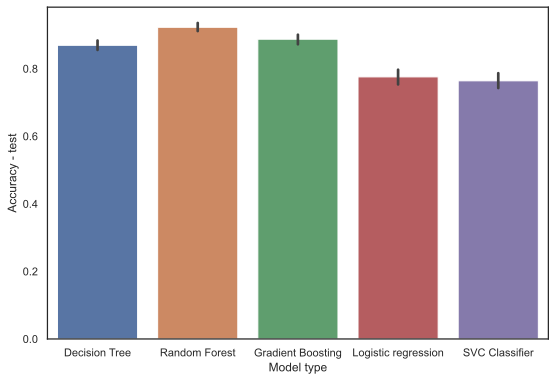

In [141]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Model type", y="Accuracy - test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], order=keys_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Accuracy_test.pdf", bbox_inches="tight")

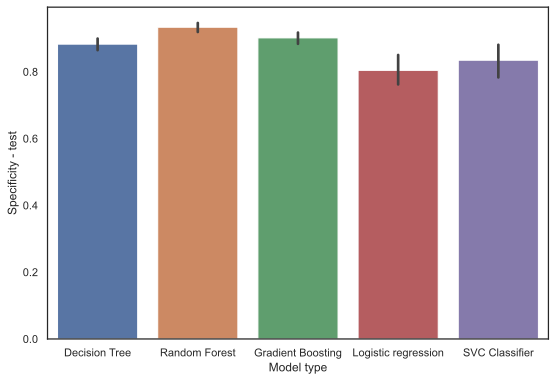

In [142]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Model type", y="Specificity - test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], order=keys_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Specificity_test.pdf", bbox_inches="tight")

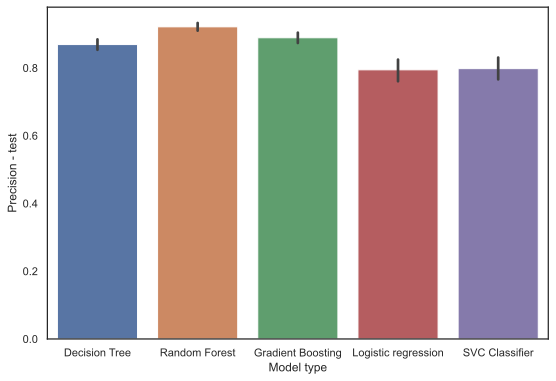

In [143]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Model type", y="Precision - test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], order=keys_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Precision_test.pdf", bbox_inches="tight")

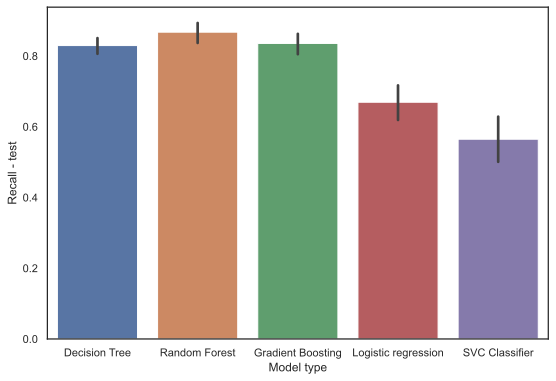

In [144]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Model type", y="Recall - test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], order=keys_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Recall_test.pdf", bbox_inches="tight")

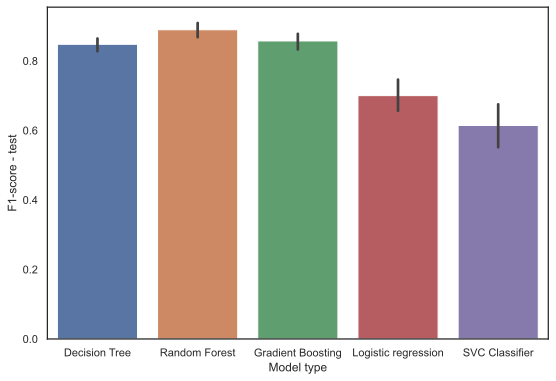

In [145]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Model type", y="F1-score - test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], order=keys_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/F1-score_test.pdf", bbox_inches="tight")

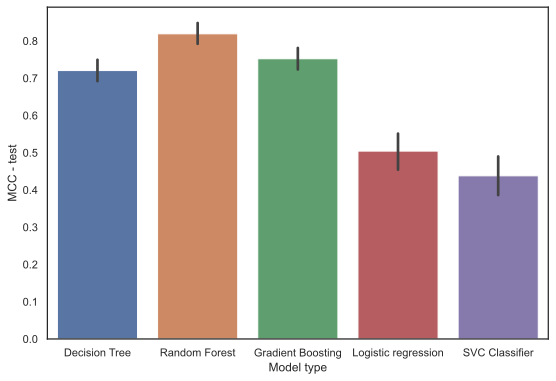

In [146]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Model type", y="MCC - test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], order=keys_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/MCC_test.pdf", bbox_inches="tight")

C:\Users\Andre\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Andre\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


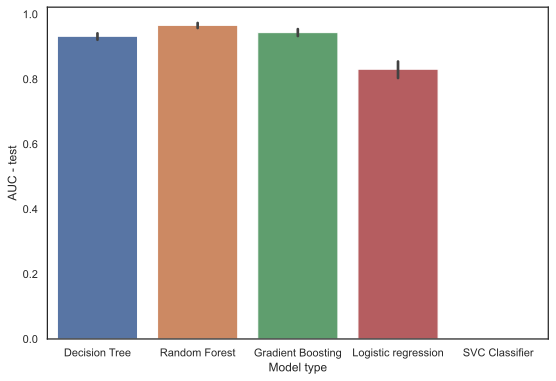

In [147]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Model type", y="AUC - test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], order=keys_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/AUC_test.pdf", bbox_inches="tight")

C:\Users\Andre\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Andre\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


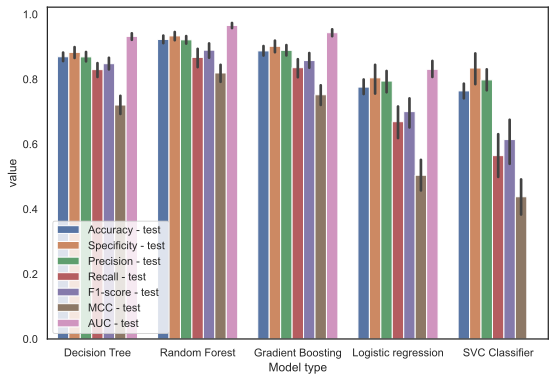

In [148]:
results = pd.melt(dataset[dataset["Dimensionality reduction technique"] == "N.A."], id_vars=['Model type'],
                  value_vars=['Accuracy - test', 'Specificity - test', 'Precision - test', 'Recall - test', 'F1-score - test', 'MCC - test', 'AUC - test'],
                  var_name='Metric')
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Model type", y="value", hue="Metric", data=results, orient="v", order=keys_order)
plt.legend(loc='lower left')
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Metrics_test.pdf", bbox_inches="tight")

Plot dataset train/test

In [149]:
keep_columns = ["Dataset - train/test", "Accuracy - test", 'Specificity - test', "Precision - test",
                "Recall - test", "F1-score - test", "MCC - test", "AUC - test"]
if export_content == "Rankings":
    d2 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Dataset - train/test"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d2 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Dataset - train/test"]).agg([np.mean, np.std])
dataset_list.append(d2.round(2))
d2

,Accuracy - test,Specificity - test,Precision - test,Recall - test,F1-score - test,MCC - test,AUC - test
Dataset - train/test,,,,,,,
filtered_active_bankruptcy_raw_full_history4_0.pkl,0.946931,0.979912,0.973158,0.904216,0.936763,0.892612,0.987885
filtered_active_bankruptcy_raw_full_history_0.pkl,0.943657,0.944215,0.938086,0.925349,0.931283,0.876411,0.987225
filtered_active_bankruptcy_raw_history4_4.pkl,0.921880,0.949065,0.960889,0.893300,0.924379,0.842656,0.977363
filtered_active_bankruptcy_small_history4_18.pkl,0.876283,0.786436,0.876779,0.902398,0.888645,0.709754,0.944026
filtered_active_bankruptcy_raw_full_history2_1.pkl,0.875544,0.890594,0.886249,0.860494,0.872986,0.751664,0.963259
filtered_active_bankruptcy_big_history_12.pkl,0.868971,0.871350,0.871382,0.866592,0.868833,0.738194,0.937557
filtered_active_bankruptcy_big_history4_18.pkl,0.809115,0.651744,0.812282,0.886944,0.844175,0.564763,0.861355
filtered_active_bankruptcy_raw_full_2.pkl,0.846109,0.866408,0.858071,0.825809,0.841180,0.693164,0.944241
filtered_active_bankruptcy_raw_full_history3_0.pkl,0.926180,0.976889,0.944047,0.760287,0.832235,0.787368,0.971601


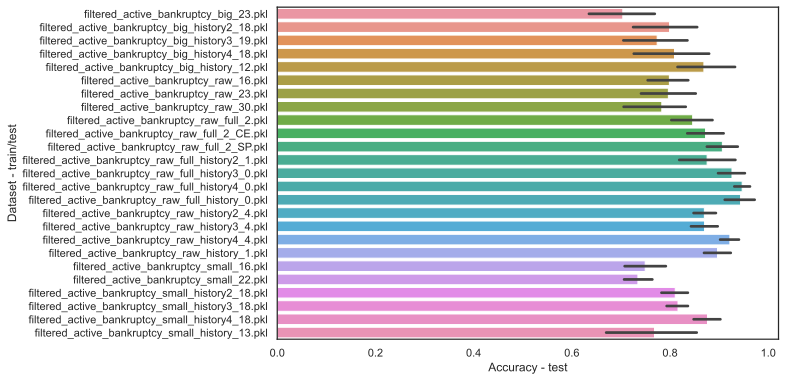

In [150]:
dataset_order = sorted(dataset["Dataset - train/test"].drop_duplicates())
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Accuracy - test", y="Dataset - train/test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], orient="h", order=dataset_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Dataset_accuracy_test.pdf", bbox_inches="tight")

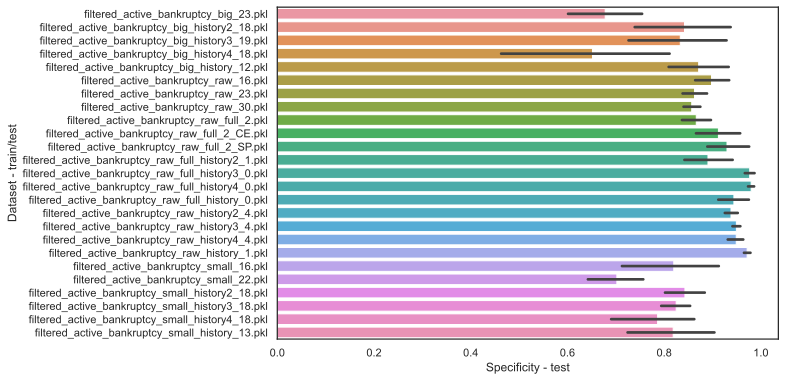

In [151]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Specificity - test", y="Dataset - train/test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], orient="h", order=dataset_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Dataset_specificity_test.pdf", bbox_inches="tight")

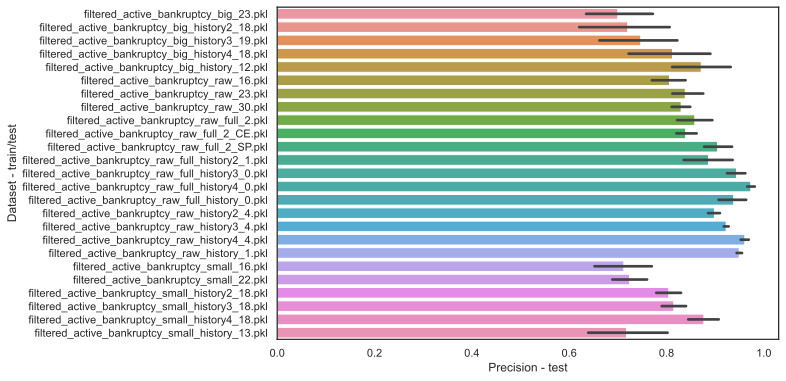

In [152]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Precision - test", y="Dataset - train/test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], orient="h", order=dataset_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Dataset_precision_test.pdf", bbox_inches="tight")

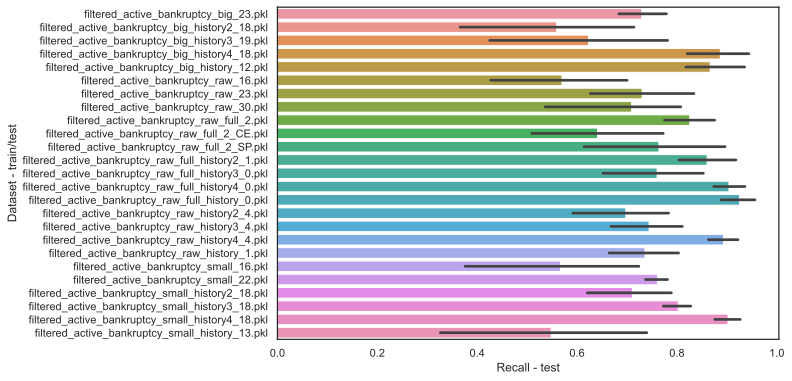

In [153]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Recall - test", y="Dataset - train/test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], orient="h", order=dataset_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Dataset_recall_test.pdf", bbox_inches="tight")

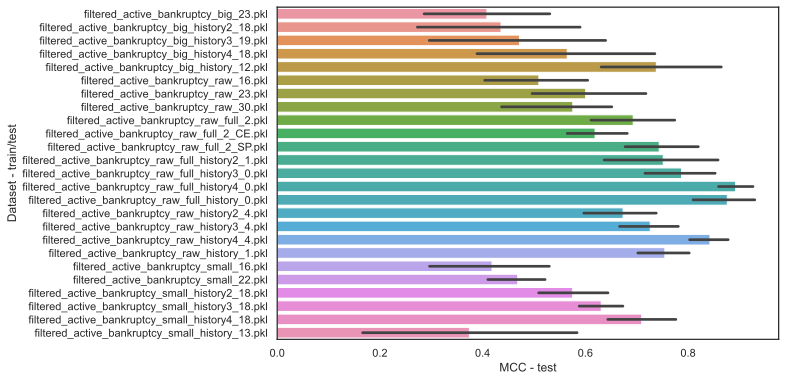

In [154]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="MCC - test", y="Dataset - train/test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], orient="h", order=dataset_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Dataset_MCC_test.pdf", bbox_inches="tight")

C:\Users\Andre\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Andre\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


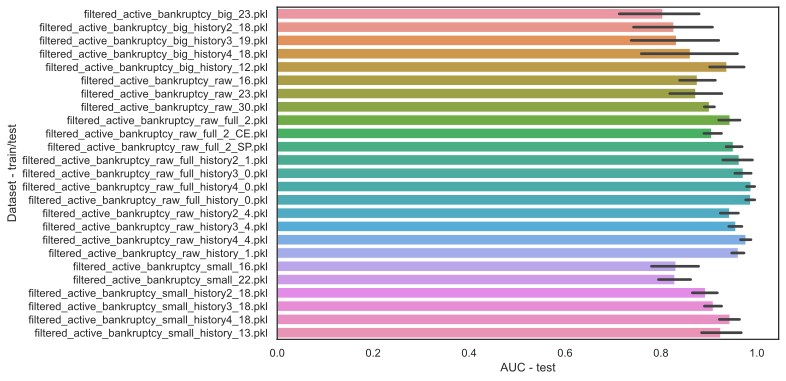

In [155]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="AUC - test", y="Dataset - train/test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], orient="h", order=dataset_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Dataset_AUC_test.pdf", bbox_inches="tight")

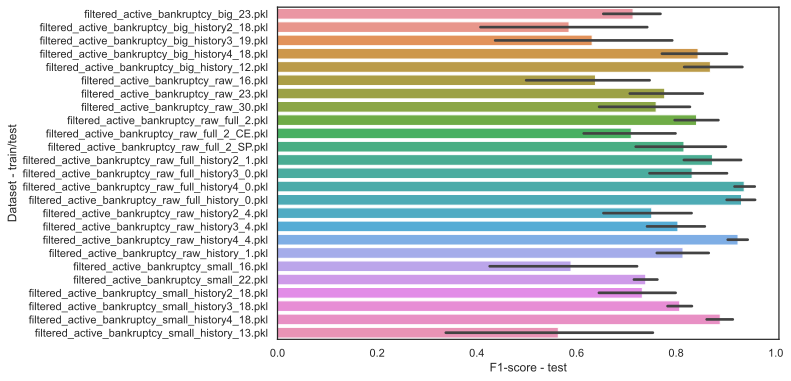

In [156]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="F1-score - test", y="Dataset - train/test", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], orient="h", order=dataset_order)
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Dataset_F1-score_test.pdf", bbox_inches="tight")

C:\Users\Andre\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Andre\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


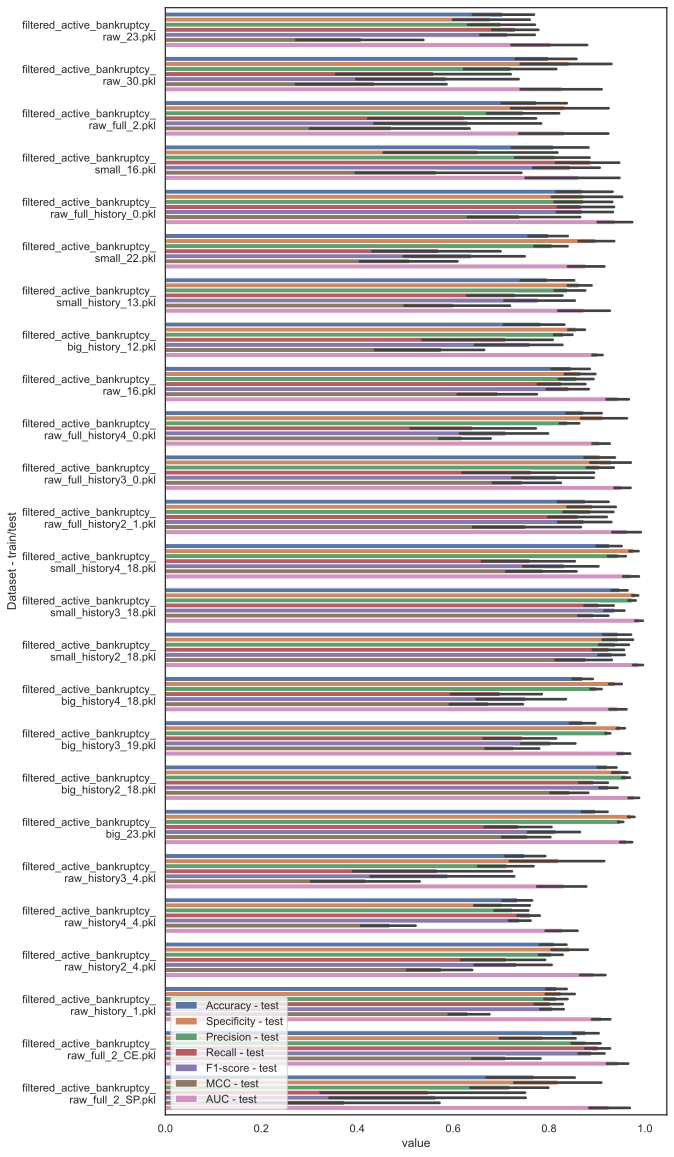

In [157]:
results = pd.melt(dataset[dataset["Dimensionality reduction technique"] == "N.A."], id_vars=['Dataset - train/test'],
                  value_vars=['Accuracy - test', 'Specificity - test', 'Precision - test', 'Recall - test', 'F1-score - test', 'MCC - test', 'AUC - test'],
                  var_name='Metric')
sns.set_theme(style="white")
plt.subplots(figsize=(9, 20))
sns.barplot(x="value", y="Dataset - train/test", hue="Metric", data=results, orient="h", order=dataset_order)
plt.legend(loc='lower left')

# Change y labels in order to have more space for the graph part
ylabels = list(dict.fromkeys(results["Dataset - train/test"].to_list()))
ylabels_new = [label.replace('filtered_active_bankruptcy_', 'filtered_active_bankruptcy_\n') for label in ylabels]
plt.yticks(np.arange(len(ylabels_new)), ylabels_new)

if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Dataset_metrics_test.pdf", bbox_inches="tight")

In [158]:
# Divide datasets in four categories
def dataset_mapping(dataset_name):
    if "history" in dataset_name:
        return "Datasets based on temporal series"
    elif "raw_full" in dataset_name:
        return "Datasets based on all raw values"
    elif "raw" in dataset_name:
        return "Datasets based on a subset of raw values"
    elif "small" in dataset_name:
        return "Datasets based only on financial estimators"
    elif "big" in dataset_name:
        return "Datasets based only on financial estimators"
    else:
        return "Other type of dataset"

# Apply mapping
results["Dataset - train/test"] = results["Dataset - train/test"].apply(dataset_mapping)
dataset_order = ["Datasets based only on financial estimators", "Datasets based on a subset of raw values",
                  "Datasets based on all raw values", "Datasets based on temporal series"]

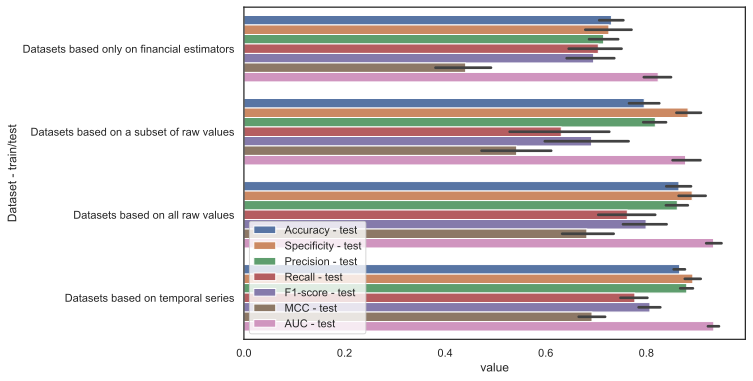

In [159]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="value", y="Dataset - train/test", hue="Metric", data=results, orient="h", order=dataset_order)
plt.legend(loc='lower left')

if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Dataset_categories_metrics_test.pdf", bbox_inches="tight")

Plot model type & dataset train/test

In [160]:
keep_columns = ["Model type", "Dataset - train/test", "Accuracy - test", 'Specificity - test',
                "Precision - test", "Recall - test", "F1-score - test", "MCC - test", "AUC - test"]
if export_content == "Rankings":
    d3 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Model type", "Dataset - train/test"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d3 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Model type", "Dataset - train/test"]).agg([np.mean, np.std])
dataset_list.append(d3.round(2))
d3

Accuracy - test  \
Model type          Dataset - train/test                                                  
Gradient Boosting   filtered_active_bankruptcy_raw_full_history4_0.pkl         0.981932   
                    filtered_active_bankruptcy_raw_history4_4.pkl              0.971829   
Random Forest       filtered_active_bankruptcy_raw_history4_4.pkl              0.971264   
                    filtered_active_bankruptcy_raw_full_history4_0.pkl         0.976653   
                    filtered_active_bankruptcy_big_history_12.pkl              0.969813   
...                                                                                 ...   
Logistic regression filtered_active_bankruptcy_big_history2_18.pkl             0.659063   
SVC Classifier      filtered_active_bankruptcy_small_16.pkl                    0.664204   
                    filtered_active_bankruptcy_small_history_13.pkl            0.705072   
                    filtered_active_bankruptcy_big_history3_19.pkl             0.690101   
                    filtered_active_bankruptcy_big_history2_18.pkl             0.818917   

                                                                        Specificity - test  \
Model type          Dataset - train/test                                                     
Gradient Boosting   filtered_active_bankruptcy_raw_full_history4_0.pkl            0.993706   
                    filtered_active_bankruptcy_raw_history4_4.pkl                 0.983166   
Random Forest       filtered_active_bankruptcy_raw_history4_4.pkl                 0.969597   
                    filtered_active_bankruptcy_raw_full_history4_0.pkl            0.986221   
                    filtered_active_bankruptcy_big_history_12.pkl                 0.971258   
...                                                                                    ...   
Logistic regression filtered_active_bankruptcy_big_history2_18.pkl                0.683523   
SVC Classifier      filtered_active_bankruptcy_small_16.pkl                       0.764007   
                    filtered_active_bankruptcy_small_history_13.pkl               0.787376   
                    filtered_active_bankruptcy_big_history3_19.pkl                0.999052   
                    filtered_active_bankruptcy_big_history2_18.pkl                0.999902   

                                                                        Precision - test  \
Model type          Dataset - train/test                                                   
Gradient Boosting   filtered_active_bankruptcy_raw_full_history4_0.pkl          0.992651   
                    filtered_active_bankruptcy_raw_history4_4.pkl               0.987741   
Random Forest       filtered_active_bankruptcy_raw_history4_4.pkl               0.978124   
                    filtered_active_bankruptcy_raw_full_history4_0.pkl          0.981837   
                    filtered_active_bankruptcy_big_history_12.pkl               0.971175   
...                                                                                  ...   
Logistic regression filtered_active_bankruptcy_big_history2_18.pkl              0.513898   
SVC Classifier      filtered_active_bankruptcy_small_16.pkl                     0.615766   
                    filtered_active_bankruptcy_small_history_13.pkl             0.608291   
                    filtered_active_bankruptcy_big_history3_19.pkl              0.660000   
                    filtered_active_bankruptcy_big_history2_18.pkl              0.542857   

                                                                        Recall - test  \
Model type          Dataset - train/test                                                
Gradient Boosting   filtered_active_bankruptcy_raw_full_history4_0.pkl       0.966759   
                    filtered_active_bankruptcy_raw_history4_4.pkl            0.960647   
Random Forest       filtered_active_bankruptcy_raw_history4_4.pkl            0.969563   
                    fil

Plot number of components

In [161]:
keep_columns = ["Number of features", "Accuracy - test", 'Specificity - test', "Precision - test",
                "Recall - test", "F1-score - test", "MCC - test", "AUC - test"]
if export_content == "Rankings":
    d4 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Number of features"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d4 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Number of features"]).agg([np.mean, np.std])
dataset_list.append(d4.round(2))
d4

,Accuracy - test,Specificity - test,Precision - test,Recall - test,F1-score - test,MCC - test,AUC - test
Number of features,,,,,,,
860,0.945294,0.962063,0.955622,0.914783,0.934023,0.884511,0.987522
430,0.875544,0.890594,0.886249,0.860494,0.872986,0.751664,0.963259
144,0.909305,0.960329,0.955147,0.814652,0.869142,0.798735,0.969418
214,0.846109,0.866408,0.858071,0.825809,0.841180,0.693164,0.944241
645,0.926180,0.976889,0.944047,0.760287,0.832235,0.787368,0.971601
130,0.906600,0.929927,0.905068,0.763975,0.815830,0.743817,0.950964
60,0.838464,0.767914,0.829787,0.826300,0.812695,0.611907,0.918907
108,0.870354,0.949332,0.922614,0.744294,0.803714,0.726337,0.956249
72,0.869902,0.938202,0.898506,0.697721,0.751176,0.673450,0.943443


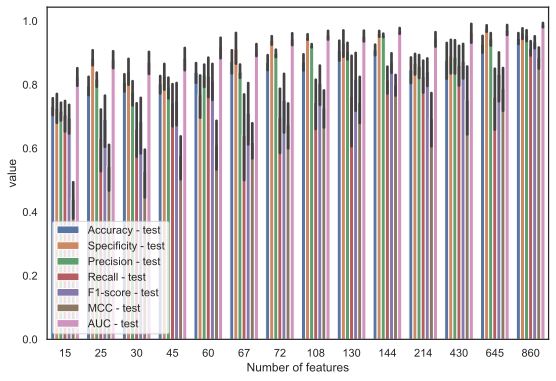

In [162]:
results = pd.melt(dataset[dataset["Dimensionality reduction technique"] == "N.A."], id_vars=['Number of features'],
                  value_vars=['Accuracy - test', 'Specificity - test', 'Precision - test', 'Recall - test', 'F1-score - test', 'MCC - test', 'AUC - test'],
                  var_name='Metric')
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Number of features", y="value", hue="Metric", data=results, orient="v")
plt.legend(loc='lower left')
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Number_of_features_metrics.pdf", bbox_inches="tight")

Plot model type & number of components

In [163]:
keep_columns = ["Model type", "Number of features", "Accuracy - test", 'Specificity - test',
                "Precision - test", "Recall - test", "F1-score - test", "MCC - test", "AUC - test"]
if export_content == "Rankings":
    d5 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Model type", "Number of features"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d5 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Model type", "Number of features"]).agg([np.mean, np.std])
dataset_list.append(d5.round(2))
d5

Accuracy - test  Specificity - test  \
Model type        Number of features                                        
Gradient Boosting 860                        0.981932            0.993706   
Random Forest     860                        0.976254            0.978751   
                  144                        0.967346            0.975699   
                  430                        0.955232            0.953843   
                  60                         0.942212            0.893010   
...                                               ...                 ...   
SVC Classifier    60                         0.734680            0.629126   
                  45                         0.721050            0.826768   
                  72                         0.790311            0.939795   
                  25                         0.717973            0.885325   
                  30                         0.745201            0.857389   

                                      Precision - test  Recall - test  \
Model type        Number of features                                    
Gradient Boosting 860                         0.992651       0.966759   
Random Forest     860                         0.976299       0.961033   
                  144                         0.975310       0.938086   
                  430                         0.953959       0.956621   
                  60                          0.942555       0.957244   
...                                                ...            ...   
SVC Classifier    60                          0.677027       0.576941   
                  45                          0.718100       0.509430   
                  72                          0.859065       0.439990   
                  25                          0.752426       0.407147   
                  30                          0.670158       0.349137   

                                      F1-score - test  MCC - test  AUC - test  
Model type        Number of features                                           
Gradient Boosting 860                        0.979518    0.963167    0.998678  
Random Forest     860                        0.968231    0.946103    0.996948  
                  144                        0.955755    0.923404    0.992712  
                  430                        0.955288    0.910468    0.989788  
                  60                         0.949694    0.865688    0.983142  
...                                               ...         ...         ...  
SVC Classifier    60                         0.553860    0.241536         NaN  
                  45                         0.528355    0.351360         NaN  
                  72                         0.523931    0.439285         NaN  
                  25                         0.490003    0.330499         NaN  
                  30                         0.367421    0.236111         NaN  

[64 rows x 7 columns]

Plot dimensionality reduction technique & number of components

In [164]:
keep_columns = ["Dimensionality reduction technique", "Number of features", "Accuracy - test", 'Specificity - test',
                "Precision - test", "Recall - test", "F1-score - test", "MCC - test", "AUC - test"]
if export_content == "Rankings":
    d6 = dataset[keep_columns].groupby(["Dimensionality reduction technique", "Number of features"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d6 = dataset[keep_columns].groupby(["Dimensionality reduction technique", "Number of features"]).agg([np.mean, np.std])
dataset_list.append(d6.round(2))
d6

Accuracy - test  \
Dimensionality reduction technique Number of features                    
PCA                                200                        0.969012   
N.A.                               860                        0.945294   
PCA                                860                        0.928030   
                                   150                        0.907054   
                                   50                         0.894537   
                                   100                        0.891983   
N.A.                               430                        0.875544   
                                   144                        0.909305   
                                   214                        0.846109   
                                   645                        0.926180   
                                   130                        0.906600   
                                   60                         0.838464   
                                   108                        0.870354   
Incremental PCA                    40                         0.780688   
N.A.                               72                         0.869902   
                                   45                         0.802100   
                                   67                         0.872348   
                                   15                         0.730591   
                                   25                         0.795824   
                                   30                         0.806770   
PCA                                30                         0.882914   

                                                       Specificity - test  \
Dimensionality reduction technique Number of features                       
PCA                                200                           0.962960   
N.A.                               860                           0.962063   
PCA                                860                           0.947406   
                                   150                           0.941316   
                                   50                            0.941130   
                                   100                           0.929513   
N.A.                               430                           0.890594   
                                   144                           0.960329   
                                   214                           0.866408   
                                   645                           0.976889   
                                   130                           0.929927   
                                   60                            0.767914   
                                   108                           0.949332   
Incremental PCA                    40                            0.772078   
N.A.                               72                            0.938202   
                                   45                            0.827686   
                                   67                            0.912173   
                                   15                            0.725579   
                                   25                            0.883023   
                                   30                            0.842663   
PCA                                30                            0.999919   

                                                       Precision - test  \
Dimensionality reduction technique Number of features                     
PCA                                200                         0.963403   
N.A.                               860                         0.955622   
PCA                                860                         0.946097   
                                   150                         0.937946   
                                   50                          0.936242   
                                   100                 

Plot dimensionality reduction technique

In [165]:
keep_columns = ["Dimensionality reduction technique", "Accuracy - test", 'Specificity - test',
                "Precision - test", "Recall - test", "F1-score - test", "MCC - test", "AUC - test"]
if export_content == "Rankings":
    d7 = dataset[keep_columns].groupby(["Dimensionality reduction technique"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d7 = dataset[keep_columns].groupby(["Dimensionality reduction technique"]).agg([np.mean, np.std])
dataset_list.append(d7.round(2))
d7

,Accuracy - test,Specificity - test,Precision - test,Recall - test,F1-score - test,MCC - test,AUC - test
Dimensionality reduction technique,,,,,,,
PCA,0.904439,0.941010,0.922507,0.839534,0.867348,0.784943,0.966860
N.A.,0.847283,0.873432,0.857100,0.759840,0.787800,0.655199,0.918892
Incremental PCA,0.780688,0.772078,0.775934,0.789298,0.782559,0.561459,0.860432


Plot imbalanced data technique

In [166]:
keep_columns = ["Imbalanced data technique", "Accuracy - test", 'Specificity - test',
                "Precision - test", "Recall - test", "F1-score - test", "MCC - test", "AUC - test"]
if export_content == "Rankings":
    d8 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Imbalanced data technique"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d8 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Imbalanced data technique"]).agg([np.mean, np.std])
dataset_list.append(d8.round(2))
d8

,Accuracy - test,Specificity - test,Precision - test,Recall - test,F1-score - test,MCC - test,AUC - test
Imbalanced data technique,,,,,,,
Oversample,0.847930,0.865985,0.867068,0.829876,0.844820,0.700072,0.926930
Undersample,0.822192,0.846760,0.845299,0.797623,0.816985,0.649371,0.908922
N.A.,0.881329,0.920612,0.860062,0.612669,0.670176,0.602707,0.921677


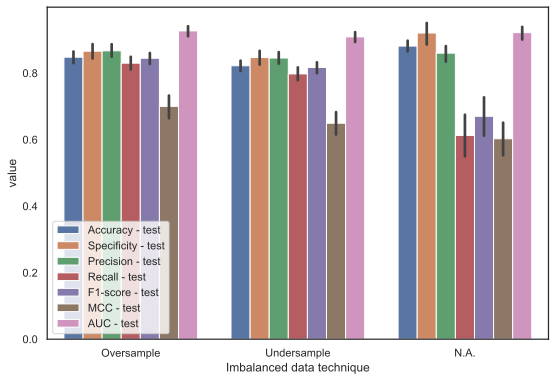

In [167]:
results = pd.melt(dataset[dataset["Dimensionality reduction technique"] == "N.A."], id_vars=['Imbalanced data technique'],
                  value_vars=['Accuracy - test', 'Specificity - test', 'Precision - test', 'Recall - test', 'F1-score - test', 'MCC - test', 'AUC - test'],
                  var_name='Metric')
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Imbalanced data technique", y="value", hue="Metric", data=results, orient="v")
plt.legend(loc='lower left')
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Imbalanced_data_technique_score_test.pdf", bbox_inches="tight")

Plot Imbalanced data technique & Dataset train/test

In [168]:
keep_columns = ["Imbalanced data technique", "Dataset - train/test", "Accuracy - test", 'Specificity - test',
                "Precision - test", "Recall - test", "F1-score - test",  "MCC - test", "AUC - test"]
if export_content == "Rankings":
    d9 = dataset[keep_columns][dataset["Dimensionality reduction technique"] == "N.A."].groupby(["Imbalanced data technique", "Dataset - train/test"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d9 = dataset[keep_columns][dataset["Dimensionality reduction technique"] == "N.A."].groupby(["Imbalanced data technique", "Dataset - train/test"]).agg([np.mean, np.std])
dataset_list.append(d9.round(2))
d9

Accuracy - test  \
Imbalanced data technique Dataset - train/test                                                  
Oversample                filtered_active_bankruptcy_raw_full_history_0.pkl          0.949327   
                          filtered_active_bankruptcy_raw_full_history4_0.pkl         0.949287   
N.A.                      filtered_active_bankruptcy_raw_history4_4.pkl              0.916989   
Undersample               filtered_active_bankruptcy_raw_full_history4_0.pkl         0.936409   
N.A.                      filtered_active_bankruptcy_small_history4_18.pkl           0.886004   
...                                                                                       ...   
                          filtered_active_bankruptcy_big_history3_19.pkl             0.799983   
                          filtered_active_bankruptcy_small_16.pkl                    0.762259   
                          filtered_active_bankruptcy_raw_16.pkl                      0.850106   
                          filtered_active_bankruptcy_big_history2_18.pkl             0.864885   
                          filtered_active_bankruptcy_small_history_13.pkl            0.882985   

                                                                              Specificity - test  \
Imbalanced data technique Dataset - train/test                                                     
Oversample                filtered_active_bankruptcy_raw_full_history_0.pkl             0.948417   
                          filtered_active_bankruptcy_raw_full_history4_0.pkl            0.977819   
N.A.                      filtered_active_bankruptcy_raw_history4_4.pkl                 0.908757   
Undersample               filtered_active_bankruptcy_raw_full_history4_0.pkl            0.974446   
N.A.                      filtered_active_bankruptcy_small_history4_18.pkl              0.516336   
...                                                                                          ...   
                          filtered_active_bankruptcy_big_history3_19.pkl                0.964256   
                          filtered_active_bankruptcy_small_16.pkl                       0.947916   
                          filtered_active_bankruptcy_raw_16.pkl                         0.981560   
                          filtered_active_bankruptcy_big_history2_18.pkl                0.987733   
                          filtered_active_bankruptcy_small_history_13.pkl               0.999815   

                                                                              Precision - test  \
Imbalanced data technique Dataset - train/test                                                   
Oversample                filtered_active_bankruptcy_raw_full_history_0.pkl           0.948316   
                          filtered_active_bankruptcy_raw_full_history4_0.pkl          0.975947   
N.A.                      filtered_active_bankruptcy_raw_history4_4.pkl               0.951232   
Undersample               filtered_active_bankruptcy_raw_full_history4_0.pkl          0.971799   
N.A.                      filtered_active_bankruptcy_small_history4_18.pkl            0.895403   
...                                                                                        ...   
                          filtered_active_bankruptcy_big_history3_19.pkl              0.745444   
                          filtered_active_bankruptcy_small_16.pkl                     0.698782   
                          filtered_active_bankruptcy_raw_16.pkl                       0.774317   
                          filtered_active_bankruptcy_big_history2_18.pkl              0.698724   
                          filtered_active_bankruptcy_small_history_13.pkl             0.623785   

                                                                              Recall - test  \
Imbalanced data technique Dataset - train/test                                                
Oversample                filtered_active_bankrupt

Plot Imbalanced data technique & Model type

In [169]:
keep_columns = ["Imbalanced data technique", "Model type", "Accuracy - test", 'Specificity - test',
                "Precision - test", "Recall - test", "F1-score - test", "MCC - test", "AUC - test"]
if export_content == "Rankings":
    d10 = dataset[keep_columns][dataset["Dimensionality reduction technique"] == "N.A."].groupby(["Imbalanced data technique", "Model type"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d10 = dataset[keep_columns][dataset["Dimensionality reduction technique"] == "N.A."].groupby(["Imbalanced data technique", "Model type"]).agg([np.mean, np.std])
dataset_list.append(d10.round(2))
d10

Accuracy - test  \
Imbalanced data technique Model type                             
Oversample                Random Forest               0.936255   
Undersample               Random Forest               0.896510   
Oversample                Gradient Boosting           0.880439   
Undersample               Gradient Boosting           0.873206   
Oversample                Decision Tree               0.871513   
Undersample               Decision Tree               0.844294   
N.A.                      Decision Tree               0.902515   
                          Random Forest               0.933798   
                          Gradient Boosting           0.920185   
Oversample                Logistic regression         0.765971   
Undersample               Logistic regression         0.753434   
Oversample                SVC Classifier              0.746682   
Undersample               SVC Classifier              0.735847   
N.A.                      Logistic regression         0.826669   
                          SVC Classifier              0.815261   

                                               Specificity - test  \
Imbalanced data technique Model type                                
Oversample                Random Forest                  0.938875   
Undersample               Random Forest                  0.905653   
Oversample                Gradient Boosting              0.884878   
Undersample               Gradient Boosting              0.883654   
Oversample                Decision Tree                  0.883858   
Undersample               Decision Tree                  0.856294   
N.A.                      Decision Tree                  0.920043   
                          Random Forest                  0.957350   
                          Gradient Boosting              0.954919   
Oversample                Logistic regression            0.787328   
Undersample               Logistic regression            0.775727   
Oversample                SVC Classifier                 0.810401   
Undersample               SVC Classifier                 0.811204   
N.A.                      Logistic regression            0.875808   
                          SVC Classifier                 0.886577   

                                               Precision - test  \
Imbalanced data technique Model type                              
Oversample                Random Forest                0.938367   
Undersample               Random Forest                0.903278   
Oversample                Gradient Boosting            0.885765   
Undersample               Gradient Boosting            0.882250   
Oversample                Decision Tree                0.880994   
Undersample               Decision Tree                0.852924   
N.A.                      Decision Tree                0.874602   
                          Random Forest                0.918610   
                          Gradient Boosting            0.905176   
Oversample                Logistic regression          0.798092   
Undersample               Logistic regression          0.787051   
Oversample                SVC Classifier               0.806091   
Undersample               SVC Classifier               0.797198   
N.A.                      Logistic regression          0.800885   
                          SVC Classifier               0.790772   

                                               Recall - test  F1-score - test  \
Imbalanced data technique Model type                                            
Oversample                Random Forest             0.933634         0.935973   
Undersample               Random Forest             0.887366         0.895151   
Oversample                Gradient Boosting         0.876001         0.880580   
Undersample               Gradient Boosting         0.862758         0.872264   
Oversample                Decision Tree             0.859169         0.869916   
Undersample               Decision Tree    

Plot model & validation metrics

In [170]:
keep_columns = ["Model type", "Accuracy - validation", 'Specificity - validation', "Precision - validation",
                "Recall - validation", "F1-score - validation", "MCC - validation", "AUC - validation"]
if export_content == "Rankings":
    d11 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Model type"]).mean().sort_values(by=['F1-score - validation'], ascending=False)
else:
    d11 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Model type"]).agg([np.mean, np.std])
dataset_list.append(d11.round(2))
d11

,Accuracy - validation,Specificity - validation,Precision - validation,Recall - validation,F1-score - validation,MCC - validation,AUC - validation
Model type,,,,,,,
Random Forest,0.892493,0.868117,0.819664,0.855759,0.828195,0.732354,0.952476
Gradient Boosting,0.867299,0.829352,0.765162,0.849168,0.792726,0.676236,0.937145
Decision Tree,0.844056,0.803198,0.739241,0.824398,0.769340,0.623101,0.909486
Logistic regression,0.731806,0.624559,0.605510,0.824962,0.668531,0.448769,0.785810
SVC Classifier,0.743583,0.685446,0.645809,0.751918,0.647927,0.429557,NaN


C:\Users\Andre\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Andre\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


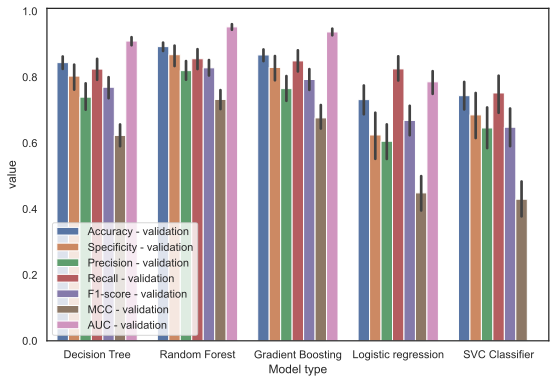

In [171]:
results = pd.melt(dataset[dataset["Dimensionality reduction technique"] == "N.A."], id_vars=['Model type'],
                  value_vars=['Accuracy - validation', 'Specificity - validation', 'Precision - validation',
                              'Recall - validation', 'F1-score - validation',  'MCC - validation', 'AUC - validation'],
                  var_name='Metric')
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Model type", y="value", hue="Metric", data=results, orient="v", order=keys_order)
plt.legend(loc='lower left')
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Metrics_validation.pdf", bbox_inches="tight")

Plot model & training time

In [172]:
keep_columns = ["Model type", "Training time"]
if export_content == "Rankings":
    d12 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Model type"]).mean().sort_values(by=['Training time'], ascending=False)
else:
    d12 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Model type"]).agg([np.mean, np.std])
dataset_list.append(d12.round(2))
d12

,Training time
Model type,
Gradient Boosting,696.797452
SVC Classifier,533.938779
Logistic regression,115.085598
Random Forest,74.106056
Decision Tree,37.979358


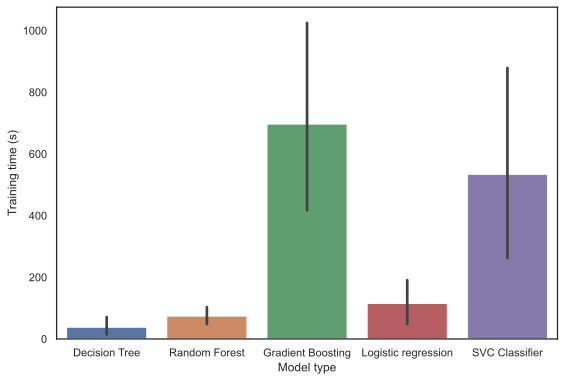

In [173]:
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
ax = sns.barplot(x="Model type", y="Training time", data=dataset[dataset["Dimensionality reduction technique"] == "N.A."], order=keys_order)
ax.set(ylabel='Training time (s)')
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Training_time.pdf", bbox_inches="tight")

Plot train/test split

In [174]:
keep_columns = ["Train/Test split", "Accuracy - test", 'Specificity - test',
                "Precision - test", "Recall - test", "F1-score - test", "MCC - test", "AUC - test"]
if export_content == "Rankings":
    d13 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Train/Test split"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d13 = dataset[dataset["Dimensionality reduction technique"] == "N.A."][keep_columns].groupby(["Train/Test split"]).agg([np.mean, np.std])
dataset_list.append(d13.round(2))
d13

,Accuracy - test,Specificity - test,Precision - test,Recall - test,F1-score - test,MCC - test,AUC - test
Train/Test split,,,,,,,
0.25,0.849353,0.882710,0.861746,0.768638,0.797681,0.669932,0.919300
0.50,0.844598,0.861395,0.851071,0.748424,0.774980,0.636082,0.918324


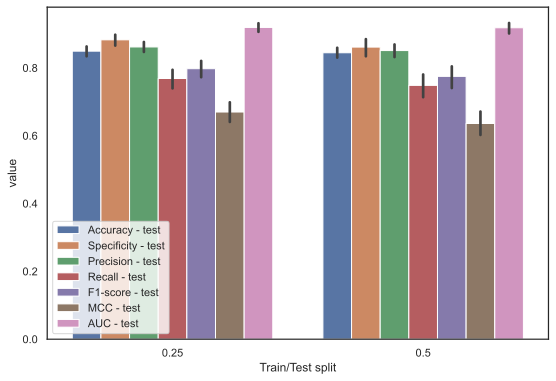

In [175]:
results = pd.melt(dataset[dataset["Dimensionality reduction technique"] == "N.A."], id_vars=['Train/Test split'],
                  value_vars=['Accuracy - test', 'Specificity - test', 'Precision - test', 'Recall - test', 'F1-score - test', 'MCC - test', 'AUC - test'],
                  var_name='Metric')
sns.set_theme(style="white")
plt.subplots(figsize=(9, 6))
sns.barplot(x="Train/Test split", y="value", hue="Metric", data=results, orient="v")
plt.legend(loc='lower left')
if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Train_test_split.pdf", bbox_inches="tight")

Plot PCA number of components

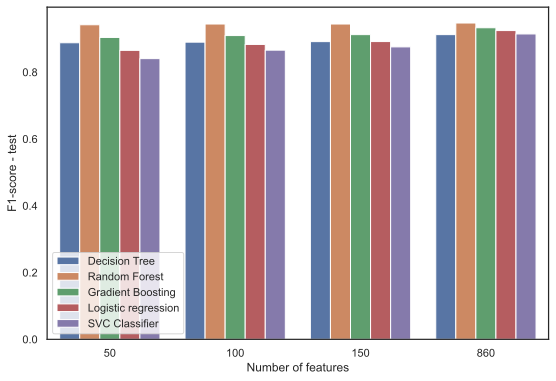

In [176]:
selected_dataset = dataset[(dataset['Dimensionality reduction technique'] == "PCA")
                           & (dataset['Dataset - train/test'] == "filtered_active_bankruptcy_raw_full_history4_0.pkl")]
# Plot only if not empty
if selected_dataset.shape[0] != 0:
    sns.set_theme(style="white")
    plt.subplots(figsize=(9, 6))
    sns.barplot(x="Number of features", y="F1-score - test", hue="Model type", data=selected_dataset, orient="v")
    plt.legend(loc='lower left')
    if to_export:
        plt.savefig(OUTPUT_PATH + "/Classification_metrics/PCA_num_features_score_test.pdf", bbox_inches="tight")

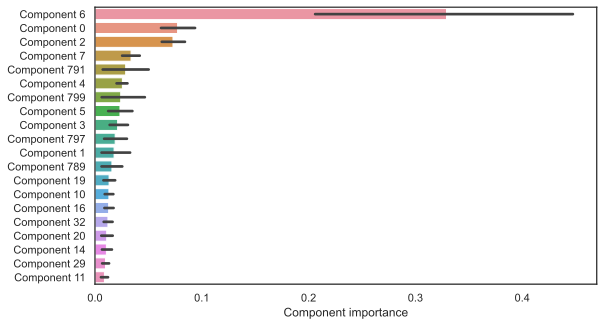

In [177]:
# Plot only if not empty
if selected_dataset.shape[0] != 0:
    # Take each dictionary containing the couples (feature_name, importance)
    dict_list = selected_dataset[(selected_dataset["Features importance"] != "N.A.")]["Features importance"].tolist()

    # Create two auxiliary dictionaries
    sum = {}
    count = {}

    # Set all the keys' possible values to 0
    # For each dictionary
    for dictionary in dict_list:
        # For each couple (key, value)
        for key, value in dictionary.items():
            sum[key] = 0
            count[key] = 0

    # Increment all the keys based on the dictionaries values
    # For each dictionary
    for dictionary in dict_list:
        # For each couple (key, value)
        for key, value in dictionary.items():
            sum[key] += value
            count[key] += 1

    # Create mean dictionary
    mean = {}

    # Compute mean for each key
    for key, value in sum.items():
        mean[key] = sum[key] / count[key]

    # Order the dictionary by value
    ordered_mean = dict(sorted(mean.items(), key=lambda item: item[1], reverse=True))

    # Take the 20 most important features
    keys = list(ordered_mean.keys())[:20]

    # Create a list of the 50 most important features values
    feature_importance = []
    feature_names = []

    # For each dictionary
    for dictionary in dict_list:
        # For each couple (key, value)
        for key, value in dictionary.items():
            # If one of the 50 most important features
            if key in keys:
                feature_names.append(key)
                feature_importance.append(value)


    # Plot the results
    sns.set_theme(style="white")
    plt.subplots(figsize=(9, 5))
    ax = sns.barplot(x=feature_importance, y=feature_names, order=keys)
    ax.set(xlabel='Component importance')

    if to_export:
        plt.savefig(OUTPUT_PATH + "/Classification_metrics/PCA_component_importance.pdf", bbox_inches="tight")

Plot feature importance

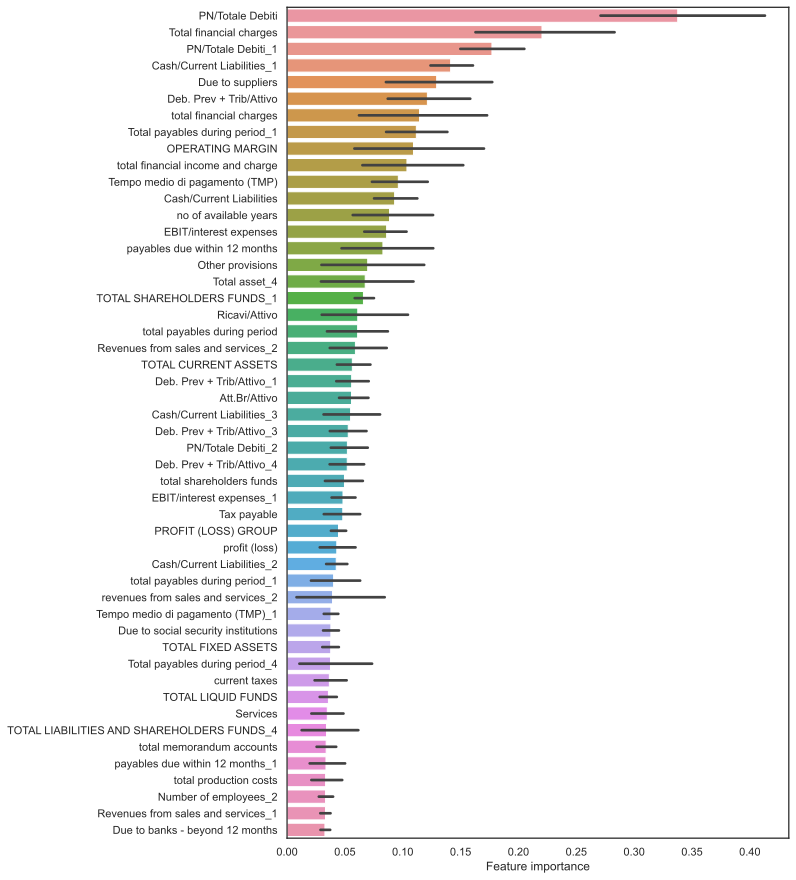

In [178]:
# Take each dictionary containing the couples (feature_name, importance)
dict_list = dataset[(dataset["Features importance"] != "N.A.") & (dataset["Dimensionality reduction technique"] == "N.A.")]["Features importance"].tolist()

# Create two auxiliary dictionaries
sum = {}
count = {}

# Set all the keys' possible values to 0
# For each dictionary
for dictionary in dict_list:
    # For each couple (key, value)
    for key, value in dictionary.items():
        sum[key] = 0
        count[key] = 0

# Increment all the keys based on the dictionaries values
# For each dictionary
for dictionary in dict_list:
    # For each couple (key, value)
    for key, value in dictionary.items():
        sum[key] += value
        count[key] += 1

# Create mean dictionary
mean = {}

# Compute mean for each key
for key, value in sum.items():
    mean[key] = sum[key] / count[key]

# Order the dictionary by value
ordered_mean = dict(sorted(mean.items(), key=lambda item: item[1], reverse=True))

# Take the 50 most important features
keys = list(ordered_mean.keys())[:50]

# Create a list of the 50 most important features values
feature_importance = []
feature_names = []

# For each dictionary
for dictionary in dict_list:
    # For each couple (key, value)
    for key, value in dictionary.items():
        # If one of the 50 most important features
        if key in keys:
            feature_names.append(key)
            feature_importance.append(value)


# Plot the results
sns.set_theme(style="white")
plt.subplots(figsize=(9, 15))
ax = sns.barplot(x=feature_importance, y=feature_names, order=keys)
ax.set(xlabel='Feature importance')

if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Feature_importance.pdf", bbox_inches="tight")

In [179]:
feature_dataset = pd.DataFrame()
feature_dataset["Feature name"] = feature_names
feature_dataset["Feature importance"] = feature_importance
if export_content == "Rankings":
    d14 = feature_dataset.groupby(["Feature name"]).mean().sort_values(by=['Feature importance'], ascending=False)
else:
    d14 = feature_dataset.groupby(["Feature name"]).agg([np.mean, np.std]).sort_values(by=[('Feature importance', 'mean')], ascending=False)
dataset_list.append(d14.round(2))
d14

,Feature importance
Feature name,
PN/Totale Debiti,0.337657
Total financial charges,0.220335
PN/Totale Debiti_1,0.177082
Cash/Current Liabilities_1,0.141391
Due to suppliers,0.129311
Deb. Prev + Trib/Attivo,0.121296
total financial charges,0.114520
Total payables during period_1,0.111750
OPERATING MARGIN,0.109276


Plot feature importance financial estimators

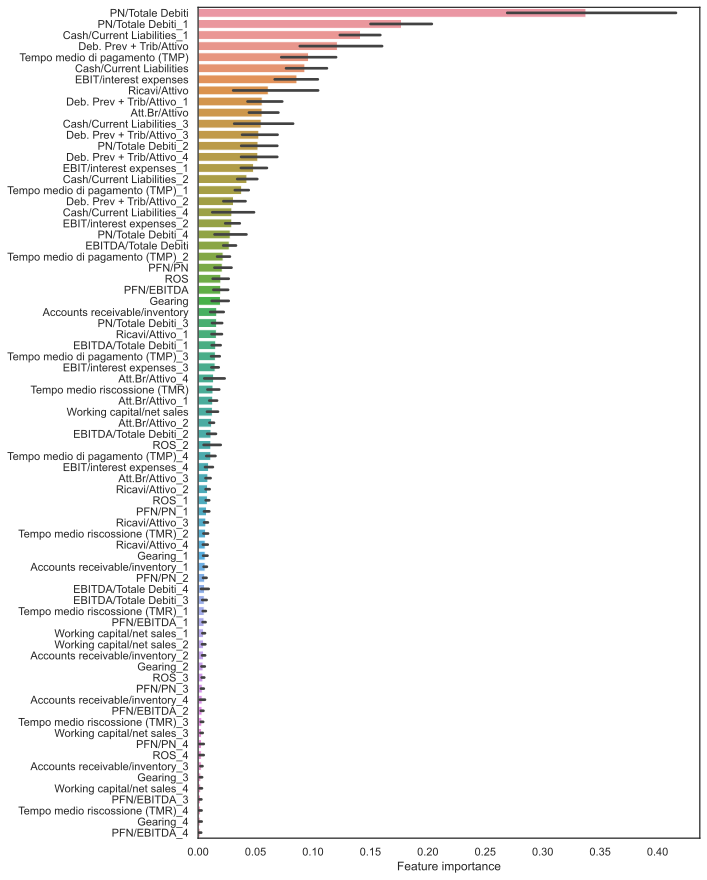

In [180]:
# Collect only the financial estimators names
financial_estimator_names_regex = "PN/TOTALE DEBITI*|DEB. PREV \+ TRIB/ATTIVO*|TEMPO MEDIO RISCOSSIONE \(TMR\)*|TEMPO MEDIO DI PAGAMENTO \(TMP\)|" \
                                  "PFN\/EBITDA*|PFN\/PN*|GEARING*|ROS*|WORKING CAPITAL\/NET SALES*|CASH\/CURRENT LIABILITIES*|" \
                                  "ACCOUNTS RECEIVABLE\/INVENTORY*|EBIT\/INTEREST EXPENSES*|ATT.BR\/ATTIVO*|RICAVI\/ATTIVO*|EBITDA\/TOTALE DEBITI*"
r = re.compile(financial_estimator_names_regex, re.IGNORECASE)
financial_estimator_keys = list(filter(r.match, ordered_mean.keys()))


# Create dictionary feature name: feature value mean
financial_estimator_dictionary = {}

# For each dictionary
for dictionary in dict_list:
    # For each couple (key, value)
    for key, value in ordered_mean.items():
        # If the key is a financial estimator
        if key in financial_estimator_keys:
            financial_estimator_dictionary[key] = value

# Order by feature importance
financial_estimator_dictionary = dict(sorted(financial_estimator_dictionary.items(), key=lambda item: item[1], reverse=True))

# Collect all value to plot mean and expected value range
financial_estimator_feature_importance = []
financial_estimator_feature_names = []

# For each dictionary
for dictionary in dict_list:
    # For each couple (key, value)
    for key, value in dictionary.items():
        # If the key is a financial estimator
        if key in financial_estimator_keys:
            financial_estimator_feature_names.append(key)
            financial_estimator_feature_importance.append(value)

# Plot the results
sns.set_theme(style="white")
plt.subplots(figsize=(9, 15))
ax = sns.barplot(x=financial_estimator_feature_importance, y=financial_estimator_feature_names, order=financial_estimator_dictionary.keys())
ax.set(xlabel='Feature importance')

if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Financial_estimator_importance.pdf", bbox_inches="tight")

In [181]:
financial_estimator_feature_dataset = pd.DataFrame()
financial_estimator_feature_dataset["Feature name"] = financial_estimator_feature_names
financial_estimator_feature_dataset["Feature importance"] = financial_estimator_feature_importance
if export_content == "Rankings":
    d15 = financial_estimator_feature_dataset.groupby(["Feature name"]).mean().sort_values(by=['Feature importance'], ascending=False)
else:
    d15 = financial_estimator_feature_dataset.groupby(["Feature name"]).agg([np.mean, np.std])\
        .sort_values(by=[('Feature importance', 'mean')], ascending=False)
dataset_list.append(d15.round(2))
d15

,Feature importance
Feature name,
PN/Totale Debiti,0.337657
PN/Totale Debiti_1,0.177082
Cash/Current Liabilities_1,0.141391
Deb. Prev + Trib/Attivo,0.121296
Tempo medio di pagamento (TMP),0.096182
...,...
Working capital/net sales_4,0.002329
PFN/EBITDA_3,0.002036
Tempo medio riscossione (TMR)_4,0.002021


Plot feature importance raw values

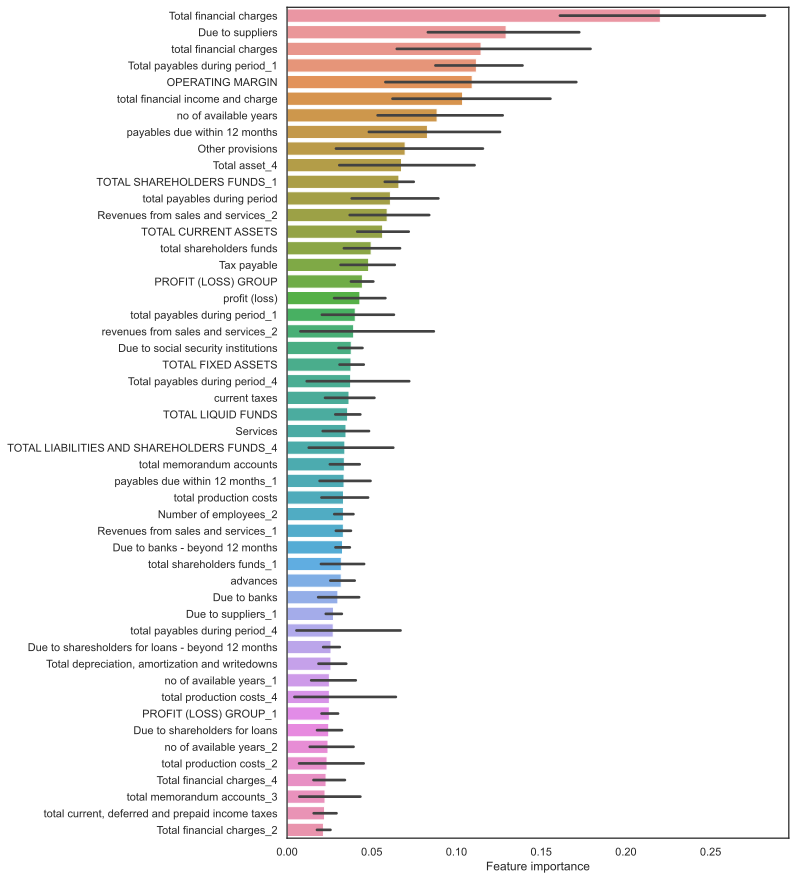

In [182]:
# Create dictionary feature name: feature value mean
raw_values_dictionary = {}

# For each dictionary
for dictionary in dict_list:
    # For each couple (key, value)
    for key, value in ordered_mean.items():
        # If the key is a raw value
        if key not in financial_estimator_keys:
            raw_values_dictionary[key] = value

# Order by feature importance
raw_values_dictionary = dict(sorted(raw_values_dictionary.items(), key=lambda item: item[1], reverse=True))
raw_values_top_keys = list(raw_values_dictionary.keys())[:50]

# Collect all value to plot mean and expected value range
raw_values_feature_importance = []
raw_values_feature_names = []

# For each dictionary
for dictionary in dict_list:
    # For each couple (key, value)
    for key, value in dictionary.items():
        # If the key is a raw value
        if key in raw_values_top_keys:
            raw_values_feature_names.append(key)
            raw_values_feature_importance.append(value)

# Plot the results
sns.set_theme(style="white")
plt.subplots(figsize=(9, 15))
ax = sns.barplot(x=raw_values_feature_importance, y=raw_values_feature_names, order=raw_values_top_keys)
ax.set(xlabel='Feature importance')

if to_export:
    plt.savefig(OUTPUT_PATH + "/Classification_metrics/Raw_values_importance.pdf", bbox_inches="tight")

Plot model type, unbalanced technique, train/test split

In [183]:
keep_columns = ["Model type", "Imbalanced data technique", "Dataset - train/test", "Accuracy - test", 'Specificity - test',
                "Precision - test", "Recall - test", "F1-score - test",  "MCC - test", "AUC - test"]
if export_content == "Rankings":
    d16 = dataset[keep_columns].groupby(["Model type", "Imbalanced data technique", "Dataset - train/test"]).mean().sort_values(by=['F1-score - test'], ascending=False)
else:
    d16 = dataset[keep_columns].groupby(["Model type", "Imbalanced data technique", "Dataset - train/test"]).agg([np.mean, np.std])
dataset_list.append(d16.round(2))
d16

Accuracy - test  \
Model type          Imbalanced data technique Dataset - train/test                                                  
Random Forest       Oversample                filtered_active_bankruptcy_raw_full_history3_0.pkl         0.984392   
                                              filtered_active_bankruptcy_raw_full_history2_1.pkl         0.982237   
Gradient Boosting   Undersample               filtered_active_bankruptcy_raw_full_history4_0.pkl         0.980743   
Random Forest       Oversample                filtered_active_bankruptcy_raw_full_history_0.pkl          0.980373   
                                              filtered_active_bankruptcy_raw_history4_4.pkl              0.979194   
...                                                                                                           ...   
Logistic regression N.A.                      filtered_active_bankruptcy_big_history3_19.pkl             0.689765   
SVC Classifier      N.A.                      filtered_active_bankruptcy_big_history3_19.pkl             0.690101   
Logistic regression N.A.                      filtered_active_bankruptcy_big_history2_18.pkl             0.818642   
SVC Classifier      N.A.                      filtered_active_bankruptcy_small_history_13.pkl            0.882961   
                                              filtered_active_bankruptcy_big_history2_18.pkl             0.818917   

                                                                                                  Specificity - test  \
Model type          Imbalanced data technique Dataset - train/test                                                     
Random Forest       Oversample                filtered_active_bankruptcy_raw_full_history3_0.pkl            0.982916   
                                              filtered_active_bankruptcy_raw_full_history2_1.pkl            0.980659   
Gradient Boosting   Undersample               filtered_active_bankruptcy_raw_full_history4_0.pkl            0.992322   
Random Forest       Oversample                filtered_active_bankruptcy_raw_full_history_0.pkl             0.976246   
                                              filtered_active_bankruptcy_raw_history4_4.pkl                 0.984847   
...                                                                                                              ...   
Logistic regression N.A.                      filtered_active_bankruptcy_big_history3_19.pkl                0.994885   
SVC Classifier      N.A.                      filtered_active_bankruptcy_big_history3_19.pkl                0.999052   
Logistic regression N.A.                      filtered_active_bankruptcy_big_history2_18.pkl                0.999058   
SVC Classifier      N.A.                      filtered_active_bankruptcy_small_history_13.pkl               0.999850   
                                              filtered_active_bankruptcy_big_history2_18.pkl                0.999902   

                                                                                                  Precision - test  \
Model type          Imbalanced data technique Dataset - train/test                                                   
Random Forest       Oversample                filtered_active_bankruptcy_raw_full_history3_0.pkl          0.982966   
                                              filtered_active_bankruptcy_raw_full_history2_1.pkl          0.980720   
Gradient Boosting   Undersample               filtered_active_bankruptcy_raw_full_history4_0.pkl          0.992139   
Random Forest       Oversample                filtered_active_bankruptcy_raw_full_history_0.pkl           0.976496   
                                              filtered_active_bankruptcy_raw_history4_4.pkl               0.984674   
...                                                                                                            ...   
Logistic regression N.A.                      filtered_active_bankruptc

Esporto in formato xlsx se richiesto

In [184]:
# Function in order to generate a unique excel file with multiple sheets
# from multiple pandas datasets
def save_xls(list_dfs, xls_path, na_replace):
    with ExcelWriter(xls_path, engine="xlsxwriter") as writer:
        for n, df in enumerate(list_dfs):
            if na_replace:
                df.to_excel(writer, 'sheet%s' % n, na_rep="N.A.")
            else:
                df.to_excel(writer, 'sheet%s' % n)
            writer.sheets["sheet"+str(n)].set_column(0, 10, 35)

In [186]:
if to_export:
    # Experiments dataset
    dataset.to_excel(OUTPUT_PATH + "/ML_model_experiments.xlsx", engine='xlsxwriter')
    if export_content == "Rankings":
        na_rep = True
    else:
        na_rep = False
    # Rankings/Description datasets
    save_xls(dataset_list, OUTPUT_PATH + "/" + export_content.lower() + ".xlsx", na_replace=na_rep)